# 第4章: 言語解析

問題30から問題35までは、以下の文章`text`（太宰治の『走れメロス』の冒頭部分）に対して、言語解析を実施せよ。問題36から問題39までは、国家を説明した文書群（日本語版ウィキペディア記事から抽出したテキスト群）をコーパスとして、言語解析を実施せよ。

In [1]:
!pip install mecab-python3
!pip install ipadic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.8/588.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 68.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ipadic: filename=ipadic-1.0.0-py3-none-any.whl size=13556704 sha256=69a2279fe9b4c16f9aef62f1eec8fb30a0303bb2380afc0dcde3c706eaeff4e3
  Stored in directory: /root/.cache/pip/wheels/44/56/37/f543963822b85260c9f948df8fac8c20169c80dc71b24dc407
Successfully built ipadic


In [35]:
text = """
メロスは激怒した。
必ず、かの邪智暴虐の王を除かなければならぬと決意した。
メロスには政治がわからぬ。
メロスは、村の牧人である。
笛を吹き、羊と遊んで暮して来た。
けれども邪悪に対しては、人一倍に敏感であった。
"""

## 30. 動詞
文章`text`に含まれる動詞をすべて表示せよ。

In [36]:
import MeCab
import ipadic

mecab = MeCab.Tagger(ipadic.MECAB_ARGS)
parsed = mecab.parse(text)

verbs = []
for line in parsed.splitlines():
    if line == 'EOS':
        break
    parts = line.split('\t')
    if len(parts) >= 2:
        word = parts[0]
        part = parts[1].split(',')[0]
        if part == '動詞':
            verbs.append(word)

for verb in verbs:
    print(verb)

し
除か
なら
し
わから
吹き
遊ん
暮し
来


## 31. 動詞の原型
文章`text`に含まれる動詞と、その原型をすべて表示せよ。

In [ ]:
print(parsed)

メロス	名詞,一般,*,*,*,*,*
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
激怒	名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
し	動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
。	記号,句点,*,*,*,*,。,。,。
必ず	副詞,助詞類接続,*,*,*,*,必ず,カナラズ,カナラズ
、	記号,読点,*,*,*,*,、,、,、
かの	連体詞,*,*,*,*,*,かの,カノ,カノ
邪智	名詞,一般,*,*,*,*,邪智,ジャチ,ジャチ
暴虐	名詞,一般,*,*,*,*,暴虐,ボウギャク,ボーギャク
の	助詞,連体化,*,*,*,*,の,ノ,ノ
王	名詞,一般,*,*,*,*,王,オウ,オー
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
除か	動詞,自立,*,*,五段・カ行イ音便,未然形,除く,ノゾカ,ノゾカ
なけれ	助動詞,*,*,*,特殊・ナイ,仮定形,ない,ナケレ,ナケレ
ば	助詞,接続助詞,*,*,*,*,ば,バ,バ
なら	動詞,非自立,*,*,五段・ラ行,未然形,なる,ナラ,ナラ
ぬ	助動詞,*,*,*,特殊・ヌ,基本形,ぬ,ヌ,ヌ
と	助詞,格助詞,引用,*,*,*,と,ト,ト
決意	名詞,サ変接続,*,*,*,*,決意,ケツイ,ケツイ
し	動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
。	記号,句点,*,*,*,*,。,。,。
メロス	名詞,一般,*,*,*,*,*
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
政治	名詞,一般,*,*,*,*,政治,セイジ,セイジ
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
わから	動詞,自立,*,*,五段・ラ行,未然形,わかる,ワカラ,ワカラ
ぬ	助動詞,*,*,*,特殊・ヌ,基本形,ぬ,ヌ,ヌ
。	記号,句点,*,*,*,*,。,。,。
メロス	名詞,一般,*,*,*,*,*
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
、	記号,読点,*,*,*,*,、,、,、
村	名詞,一般,*,*,*,*,村,ムラ,ムラ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
牧人	名詞,一般,*,*,*,*,牧人,ボクジン,ボクジン
で	助

In [37]:
import MeCab
import ipadic

mecab = MeCab.Tagger(ipadic.MECAB_ARGS)
parsed = mecab.parse(text)
verbs_base_form = []
for line in parsed.splitlines():
    if line == 'EOS':
        break
    parts = line.split('\t')
    if len(parts) >= 2:
        word = parts[0]
        part_info = parts[1].split(',')
        part = part_info[0]
        base_form = part_info[6]
        if part == '動詞':
            verbs_base_form.append((word, base_form))

for verb, base in verbs_base_form:
    print(f'動詞:{verb}, 原型:{base}')

動詞:し, 原型:する
動詞:除か, 原型:除く
動詞:なら, 原型:なる
動詞:し, 原型:する
動詞:わから, 原型:わかる
動詞:吹き, 原型:吹く
動詞:遊ん, 原型:遊ぶ
動詞:暮し, 原型:暮す
動詞:来, 原型:来る


## 32. 「AのB」
文章`text`において、2つの名詞が「の」で連結されている名詞句をすべて抽出せよ。

In [38]:
import MeCab
import ipadic

mecab = MeCab.Tagger(ipadic.MECAB_ARGS)
parsed = mecab.parse(text)

noun_phrases = []
tokens = []
verbs_base_form = []
for line in parsed.splitlines():
    if line == 'EOS':
        break
    parts = line.split('\t')
    if len(parts) >= 2:
        word = parts[0]
        part_info = parts[1].split(',')
        part = part_info[0]
        tokens.append((word, part))

for i in range(len(tokens) - 2):
  word1, pos1 = tokens[i]
  word2, pos2 = tokens[i+1]
  word3, pos3 = tokens[i+2]

  if pos1 == '名詞' and pos2 == '助詞' and word2 == 'の' and pos3 == '名詞':
    noun_phrases.append(word1 + 'の' + word3)

for phrase in noun_phrases:
    print(phrase)

暴虐の王
村の牧人


## 33. 係り受け解析

文章`text`に係り受け解析を適用し、係り元と係り先のトークン（形態素や文節などの単位）をタブ区切り形式ですべて抽出せよ。

In [30]:
!python -m spacy download ja_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 88.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ja_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [47]:
import spacy

nlp = spacy.load("ja_core_news_sm")

doc = nlp(text)

print("係り元\t係り先")
print("-------\t-------")
for token in doc:
  if token.head != token:
    print(f"{token.text}\t{token.head.text}")

係り元	係り先
-------	-------
メロス	激怒
は	メロス
し	激怒
た	激怒
。	激怒

	。
必ず	決意
、	必ず
かの	除か
邪智	暴虐
暴虐	王
の	暴虐
王	除か
を	王
除か	決意
なけれ	除か
ば	なけれ
なら	なけれ
ぬ	なけれ
と	除か
し	決意
た	決意
。	決意

	。
メロス	わから
に	メロス
は	メロス
政治	わから
が	政治
ぬ	わから
。	わから

	。
メロス	牧人
は	メロス
、	メロス
村	牧人
の	村
で	牧人
ある	で
。	牧人

	。
笛	吹き
を	笛
吹き	暮し
、	吹き
羊	暮し
と	羊
遊ん	暮し
で	遊ん
て	暮し
来	暮し
た	暮し
。	暮し
邪悪	敏感
に	邪悪
対し	に
ては	に
、	邪悪
人	倍
一	倍
倍	敏感
に	倍
で	敏感
あっ	で
た	敏感
。	敏感


## 34. 主述の関係
文章`text`において、「メロス」が主語であるときの述語を抽出せよ。

In [45]:
import MeCab
import subprocess
import ipadic

mecab = MeCab.Tagger(ipadic.MECAB_ARGS)
sentences = text.split("。")
predicates = []

for sentence in sentences:
    if "メロスは" in sentence:
        words = mecab.parse(sentence).split('\n')
        predicate_candidate = ""
        parts_list = []
        for word_info in words:
            parts = word_info.split('\t')
            if len(parts) >= 2:
                parts_list.append((parts[0], parts[1].split(',')))

        predicate = ""
        verb_found = False
        for i, (surface, features) in enumerate(parts_list):
            if features[0] in ['動詞', '形容詞', '助動詞'] and surface != 'は':
                predicate += surface
                verb_found = True
            elif verb_found and features[0] == '助詞' and features[1] in ['連体化', '格助詞', '接続助詞']:
                break # 助詞が続いたら述語の終わりとみなす（暫定的なルール）
            elif verb_found and features[0] == '記号':
                predicate += surface
                break # 句読点で終わる場合
            elif verb_found and features[0] == '助動詞':
                predicate += surface
            elif not verb_found and features[0] == '名詞' and features[1] == 'サ変接続':
                predicate += surface
            elif not verb_found and surface == 'で':
                predicate += surface
            elif not verb_found and surface == 'ある':
                predicate += surface


        if predicate:
            predicates.append(predicate.rstrip('、'))


# 重複を削除して表示
unique_predicates = list(set(predicates))
print("「メロス」が主語である文の述語候補:")
for predicate in unique_predicates:
    print(predicate)

「メロス」が主語である文の述語候補:
激怒した
である


In [50]:
nlp = spacy.load("ja_core_news_sm")
doc = nlp(text)
for token in doc:
  if token.dep_=="nsubj" and token.text=="メロス":
    print(f"主語:{token.text}\t述語:{token.head.text}")


主語:メロス	述語:激怒
主語:メロス	述語:牧人


## 35. 係り受け木
「メロスは激怒した。」の係り受け木を可視化せよ。

In [48]:
from spacy import displacy

nlp = spacy.load("ja_core_news_sm")
doc = nlp("メロスは激怒した。")
displacy.render(doc,style="dep",jupyter=True)


## 36. 単語の出現頻度

問題36から39までは、Wikipediaの記事を以下のフォーマットで書き出したファイル[jawiki-country.json.gz](/data/jawiki-country.json.gz)をコーパスと見なし、統計的な分析を行う。

* 1行に1記事の情報がJSON形式で格納される
* 各行には記事名が"title"キーに、記事本文が"text"キーの辞書オブジェクトに格納され、そのオブジェクトがJSON形式で書き出される
* ファイル全体はgzipで圧縮される

まず、第3章の処理内容を参考に、Wikipedia記事からマークアップを除去し、各記事のテキストを抽出せよ。そして、コーパスにおける単語（形態素）の出現頻度を求め、出現頻度の高い20語とその出現頻度を表示せよ。

In [83]:
import gzip
import json
import re

path = 'jawiki-country.json.gz'
all_text = ''
with gzip.open(path, 'rt', encoding='utf-8') as f:
    for line in f:
      if(json.loads(line)['title'] == '日本'):
        all_text += json.loads(line)['text']

all_text = re.sub(r'\'{2,5}', '', all_text)
all_text = re.sub(r'\[\[(?!ファイル)([^\|]+?)\]\]', r'\1', all_text)
all_text = re.sub(r'\[\[(?!ファイル)(?:[^\|]*)\|*(.*?)\]\]', r'\1', all_text)
all_text = re.sub(r'\{\{[^\|]+?\}\}', '', all_text)
all_text = re.sub(r'\{\{(?:lang|仮リンク)(?:.*?)\|([^\|]*?)\}\}', r'\1', all_text)
all_text = re.sub(r'\{\{.+?\}\}', '', all_text)
all_text = re.sub(r'<.+?>', '', all_text)
all_text = re.sub(r'\[\[ファイル:([^\|]+?)\|.*?\]\]', r'\1', all_text)
all_text = re.sub(r'\[.+?\]', '', all_text)

In [84]:
from collections import Counter
import MeCab
import ipadic

# MeCabの初期化 (Owakatiなし)
mecab = MeCab.Tagger(ipadic.MECAB_ARGS)

# テキストを形態素解析
node = mecab.parseToNode(all_text)
words = []
while node:
    words.append(node.surface)
    node = node.next

# 出現頻度をカウント
word_counts = Counter(words)

# 出現頻度の高い上位20語を取得
top_20 = word_counts.most_common(20)

# 結果を表示
print("出現頻度の高い上位20語:")
for word, count in top_20:
    print(f"{word}: {count}")

出現頻度の高い上位20語:
、: 3036
の: 3001
に: 1604
。: 1533
が: 1469
は: 1437
を: 1360
た: 1063
で: 1015
と: 1002
て: 881
し: 866
日本: 746
（: 706
）: 667
年: 645
」: 632
「: 570
・: 471
いる: 462


## 37. 名詞の出現頻度
コーパスにおける名詞の出現頻度を求め、出現頻度の高い20語とその出現頻度を表示せよ。

In [77]:
from collections import Counter
import MeCab
import ipadic

# MeCabの初期化 (Owakatiなし)
mecab = MeCab.Tagger(ipadic.MECAB_ARGS)

# テキストを形態素解析
node = mecab.parseToNode(all_text)
words = []
while node:
    # 名詞であるかをチェック
    if node.feature.split(',')[0] == '名詞':
        words.append(node.surface)
    node = node.next

# 出現頻度をカウント
word_counts = Counter(words)

# 出現頻度の高い上位20語を取得
top_20 = word_counts.most_common(20)

# 結果を表示
print("出現頻度の高い名詞上位20語:")
for word, count in top_20:
    print(f"{word}: {count}")

出現頻度の高い名詞上位20語:
日本: 746
年: 645
国: 245
的: 217
日: 188
人: 167
こと: 162
県: 162
世界: 160
月: 156
3: 151
1: 139
2: 136
関係: 123
経済: 117
中国: 112
ため: 94
地域: 93
4: 88
地方: 88


## 38. TF・IDF
日本に関する記事における名詞のTF・IDFスコアを求め、TF・IDFスコア上位20語とそのTF, IDF, TF・IDFを表示せよ。

In [79]:
from collections import Counter
import MeCab
import ipadic
import math

# MeCabの初期化 (Owakatiなし)
mecab = MeCab.Tagger(ipadic.MECAB_ARGS)

# テキストから名詞を抽出
node = mecab.parseToNode(all_text)
nouns = []
while node:
    if node.feature.split(',')[0] == '名詞':
        nouns.append(node.surface)
    node = node.next

# TFの算出
tf = Counter(nouns)

# IDFの設定 (単一文書なので、ここでは簡略化)
idf = 1

# TF-IDFの算出
tfidf_scores = {}
for term, freq in tf.items():
    tfidf_scores[term] = freq * idf

# TF-IDFスコアでソートし、上位20語を表示
sorted_tfidf = sorted(tfidf_scores.items(), key=lambda item: item[1], reverse=True)
top_20_tfidf = sorted_tfidf[:20]

print("「日本」の記事における名詞のTF-IDFスコア上位20語 (all_textから読み取り):")
for term, tfidf in top_20_tfidf:
    term_freq = tf[term]
    print(f"単語: {term}, TF: {term_freq}, IDF: {idf:.4f}, TF-IDF: {tfidf:.4f}")

「日本」の記事における名詞のTF-IDFスコア上位20語 (all_textから読み取り):
単語: 日本, TF: 746, IDF: 1.0000, TF-IDF: 746.0000
単語: 年, TF: 645, IDF: 1.0000, TF-IDF: 645.0000
単語: 国, TF: 245, IDF: 1.0000, TF-IDF: 245.0000
単語: 的, TF: 217, IDF: 1.0000, TF-IDF: 217.0000
単語: 日, TF: 188, IDF: 1.0000, TF-IDF: 188.0000
単語: 人, TF: 167, IDF: 1.0000, TF-IDF: 167.0000
単語: こと, TF: 162, IDF: 1.0000, TF-IDF: 162.0000
単語: 県, TF: 162, IDF: 1.0000, TF-IDF: 162.0000
単語: 世界, TF: 160, IDF: 1.0000, TF-IDF: 160.0000
単語: 月, TF: 156, IDF: 1.0000, TF-IDF: 156.0000
単語: 3, TF: 151, IDF: 1.0000, TF-IDF: 151.0000
単語: 1, TF: 139, IDF: 1.0000, TF-IDF: 139.0000
単語: 2, TF: 136, IDF: 1.0000, TF-IDF: 136.0000
単語: 関係, TF: 123, IDF: 1.0000, TF-IDF: 123.0000
単語: 経済, TF: 117, IDF: 1.0000, TF-IDF: 117.0000
単語: 中国, TF: 112, IDF: 1.0000, TF-IDF: 112.0000
単語: ため, TF: 94, IDF: 1.0000, TF-IDF: 94.0000
単語: 地域, TF: 93, IDF: 1.0000, TF-IDF: 93.0000
単語: 4, TF: 88, IDF: 1.0000, TF-IDF: 88.0000
単語: 地方, TF: 88, IDF: 1.0000, TF-IDF: 88.0000


## 39. Zipfの法則
コーパスにおける単語の出現頻度順位を横軸、その出現頻度を縦軸として、両対数グラフをプロットせよ。

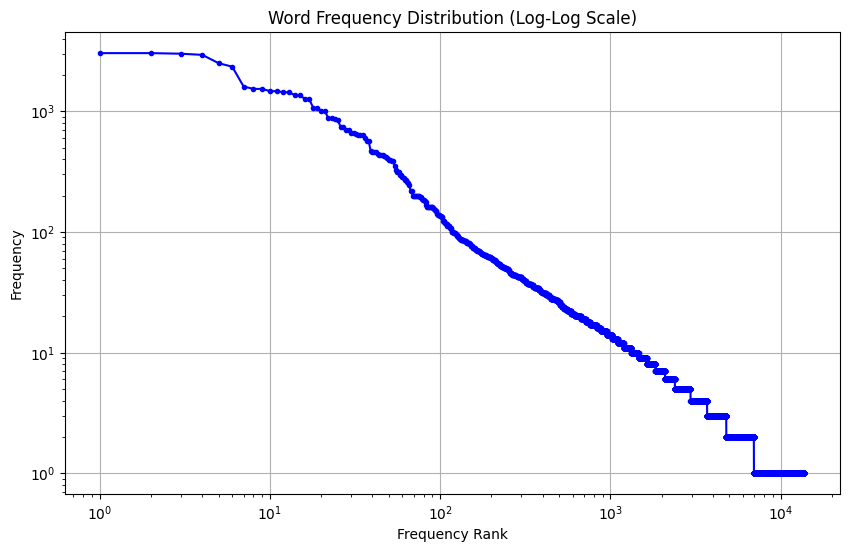

In [69]:
from collections import Counter
import MeCab
import ipadic
import math
import numpy as np
import matplotlib.pyplot as plt

# MeCabの初期化 (Owakatiなし)
mecab = MeCab.Tagger(ipadic.MECAB_ARGS)

# テキストを形態素解析し、単語リストを取得
words = mecab.parse(all_text).split()

# 単語の出現頻度を計算
word_counts = Counter(words)

# 出現頻度で降順にソート
sorted_word_counts = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)

# 順位と出現頻度のリストを作成
ranks = np.arange(1, len(sorted_word_counts) + 1)
frequencies = [count for word, count in sorted_word_counts]

# 両対数プロット
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='.', linestyle='-', color='blue')
plt.xlabel('Frequency Rank')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution (Log-Log Scale)')
plt.grid(True)
plt.show()